In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1.11 Display outputs of all commands from a cell--not just of the last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
df = pd.read_csv("C:/Users/Snigdha/Desktop/train.csv")
df.head()

C:\Users\Snigdha\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (8,9,10,11,12,43,157,196,214,225,228,229,231,235,238) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,ID,VAR_0001,VAR_0002,VAR_0003,VAR_0004,VAR_0005,VAR_0006,VAR_0007,VAR_0008,VAR_0009,...,VAR_1926,VAR_1927,VAR_1928,VAR_1929,VAR_1930,VAR_1931,VAR_1932,VAR_1933,VAR_1934,target
0,2,H,224,0,4300,C,0.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,IAPS,0
1,4,H,7,53,4448,B,1.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,IAPS,0
2,5,H,116,3,3464,C,0.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,IAPS,0
3,7,H,240,300,3200,C,0.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,RCC,0
4,8,R,72,261,2000,N,0.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,BRANCH,1


In [4]:
df.shape

(145231, 1934)

In [5]:
df.sample(frac=0.2).to_csv('C:/Users/Snigdha/Desktop/train_small.csv')

In [6]:
df_new = pd.read_csv("C:/Users/Snigdha/Desktop/train_small.csv")
df_new.head()

C:\Users\Snigdha\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (9,10,11,12,13,44,158,197,215,226,229,230,232,236,239) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,ID,VAR_0001,VAR_0002,VAR_0003,VAR_0004,VAR_0005,VAR_0006,VAR_0007,VAR_0008,...,VAR_1926,VAR_1927,VAR_1928,VAR_1929,VAR_1930,VAR_1931,VAR_1932,VAR_1933,VAR_1934,target
0,128859,257606,H,144,156,2933,B,0.0,0.0,False,...,98,98,998,999999998,998,998,9998,9998,BRANCH,0
1,41180,82172,H,180,180,2967,B,0.0,0.0,False,...,98,98,998,999999998,998,998,9998,9998,IAPS,0
2,1438,2794,R,139,62,2156,B,0.0,0.0,False,...,98,98,998,999999998,998,998,9998,9998,BRANCH,0
3,95149,190124,R,84,0,0,N,0.0,0.0,False,...,98,98,998,999999998,998,998,9998,9998,BRANCH,0
4,100585,201005,R,24,96,1200,C,0.0,0.0,False,...,98,98,998,999999998,998,998,9998,9998,RCC,0


In [7]:
df_new.shape

(29046, 1935)

In [8]:
df_new.target.value_counts()

0    22245
1     6801
Name: target, dtype: int64

(array([22245.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  6801.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

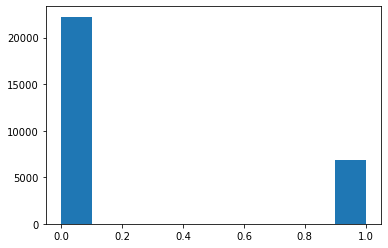

In [9]:
plt.hist(df_new["target"])

In [10]:
categorical = df_new.select_dtypes(include=[np.object]).columns
numerical = df_new.select_dtypes(include=[np.number]).columns

In [11]:
from imblearn.over_sampling import SMOTE

In [12]:
null_count = df_new.isnull().sum(axis=0).sort_values(ascending=False)
null_count.head(30)

VAR_0207    29046
VAR_0213    29046
VAR_0840    29046
VAR_0214    29045
VAR_0157    28863
VAR_0158    28625
VAR_0205    28591
VAR_0167    28578
VAR_0206    28568
VAR_0177    28408
VAR_0156    27850
VAR_0159    27850
VAR_0209    27175
VAR_0168    26941
VAR_0178    26655
VAR_0166    26251
VAR_0169    26251
VAR_0176    25560
VAR_0179    25560
VAR_0211    25161
VAR_0210    25161
VAR_0208    25161
VAR_0073    20247
VAR_0074    20247
VAR_0212     2472
VAR_0350      176
VAR_0375      174
VAR_0344      174
VAR_0354      174
VAR_0353      174
dtype: int64

In [13]:
np.sum(null_count > 0.1 * df_new.shape[0])

24

In [14]:
missing = [feature for feature in df_new.columns if null_count[feature] > 0.1 * df_new.shape[0]]
df_new.drop(missing, axis=1, inplace=True)

In [15]:
total = df_new.isnull().sum().sort_values(ascending=False)
percent = total / df_new.shape[0]
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [16]:
categorical = df_new.select_dtypes(include=[np.object]).columns
fill_missing_examples = [feat for feat in percent.index if percent[feat] > 0.01]

# filling in the missing data for features containing many of them
for col in fill_missing_examples:
    if col in categorical:
        # fill missing data with mode
        df_new[col].fillna(df_new[col].mode(), inplace=True)
    else:
        # fill missing data with mean
        df_new[col].fillna(df_new[col].mean(), inplace=True)

# removing rows with missing data in them (only a few examples will be deleted at this point)
df_new.dropna(axis=0, inplace=True)

In [17]:
df_new.isnull().sum().max()

0

In [18]:
df_new.shape

(28862, 1911)

In [19]:
values_count = df_new.nunique(dropna=False).sort_values()
np.sum(values_count == 1)

59

In [20]:
constants = [feature for feature in df_new.columns if values_count[feature] == 1]
df_new.drop(constants, axis=1, inplace=True)

In [21]:
df_new.shape

(28862, 1852)

In [22]:
y = df_new.pop('target')

In [23]:
df_new.head()

,Unnamed: 0,ID,VAR_0001,VAR_0002,VAR_0003,VAR_0004,VAR_0005,VAR_0006,VAR_0007,VAR_0013,...,VAR_1925,VAR_1926,VAR_1927,VAR_1928,VAR_1929,VAR_1930,VAR_1931,VAR_1932,VAR_1933,VAR_1934
0,128859,257606,H,144,156,2933,B,0.0,0.0,0.0,...,0,98,98,998,999999998,998,998,9998,9998,BRANCH
1,41180,82172,H,180,180,2967,B,0.0,0.0,0.0,...,0,98,98,998,999999998,998,998,9998,9998,IAPS
2,1438,2794,R,139,62,2156,B,0.0,0.0,0.0,...,0,98,98,998,999999998,998,998,9998,9998,BRANCH
3,95149,190124,R,84,0,0,N,0.0,0.0,0.0,...,0,98,98,998,999999998,998,998,9998,9998,BRANCH
4,100585,201005,R,24,96,1200,C,0.0,0.0,0.0,...,0,98,98,998,999999998,998,998,9998,9998,RCC


In [24]:
categorical = df_new.select_dtypes(include=[np.object]).columns
numerical = df_new.select_dtypes(include=[np.number]).columns

In [25]:
df_new[numerical].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28862 entries, 0 to 29045
Columns: 1827 entries, Unnamed: 0 to VAR_1933
dtypes: float64(423), int64(1404)
memory usage: 402.5 MB


In [26]:
df_new[numerical].astype('int64')

,Unnamed: 0,ID,VAR_0002,VAR_0003,VAR_0004,VAR_0006,VAR_0007,VAR_0013,VAR_0014,VAR_0015,...,VAR_1924,VAR_1925,VAR_1926,VAR_1927,VAR_1928,VAR_1929,VAR_1930,VAR_1931,VAR_1932,VAR_1933
0,128859,257606,144,156,2933,0,0,0,0,0,...,9998,0,98,98,998,999999998,998,998,9998,9998
1,41180,82172,180,180,2967,0,0,0,0,0,...,188,0,98,98,998,999999998,998,998,9998,9998
2,1438,2794,139,62,2156,0,0,0,0,0,...,9998,0,98,98,998,999999998,998,998,9998,9998
3,95149,190124,84,0,0,0,0,0,0,0,...,9998,0,98,98,998,999999998,998,998,9998,9998
4,100585,201005,24,96,1200,0,0,0,0,0,...,9998,0,98,98,998,999999998,998,998,9998,9998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29041,60990,121923,5,36,15000,0,0,0,0,0,...,9998,0,98,98,998,999999998,998,998,9998,9998
29042,90000,179874,36,48,3330,0,0,0,0,0,...,9998,1,0,1,0,999999997,400,400,9996,26
29043,22925,45638,212,304,9272,0,0,0,0,0,...,163,0,98,98,998,999999998,998,998,9998,9998
29044,59956,119857,3,42,2940,3,4,3,5,5,...,9998,0,98,98,998,999999998,998,998,9998,9998


In [27]:
df_new[numerical].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28862 entries, 0 to 29045
Columns: 1827 entries, Unnamed: 0 to VAR_1933
dtypes: float64(423), int64(1404)
memory usage: 402.5 MB


In [28]:
df_new[categorical].head(20)
df_new[numerical].head(20)

,VAR_0001,VAR_0005,VAR_0075,VAR_0200,VAR_0204,VAR_0217,VAR_0226,VAR_0230,VAR_0232,VAR_0236,...,VAR_0325,VAR_0342,VAR_0352,VAR_0353,VAR_0354,VAR_0404,VAR_0466,VAR_0467,VAR_0493,VAR_1934
0,H,B,17OCT12:00:00:00,CALUMET CITY,01FEB14:00:39:00,17OCT12:02:00:00,False,False,True,True,...,S,EF,O,O,U,-1,-1,-1,-1,BRANCH
1,H,B,28MAR12:00:00:00,MOSS POINT,30JAN14:20:00:00,28MAR12:02:00:00,False,False,True,True,...,S,-1,U,O,U,-1,-1,-1,-1,IAPS
2,R,B,04AUG12:00:00:00,SAVANNAH,31JAN14:18:04:00,04AUG12:02:00:00,False,False,True,True,...,R,CE,U,R,U,-1,-1,-1,-1,BRANCH
3,R,N,06OCT12:00:00:00,ALTUS,31JAN14:23:38:00,06OCT12:02:00:00,False,False,True,True,...,H,FF,U,R,U,-1,-1,-1,-1,BRANCH
4,R,C,04DEC11:00:00:00,INDIANAPOLIS,29JAN14:23:32:00,04DEC11:02:00:00,False,False,True,True,...,S,DD,U,U,O,-1,-1,-1,-1,RCC
5,R,C,09JUN10:00:00:00,PASADENA,31JAN14:16:12:00,29JUN12:02:00:00,False,False,False,True,...,S,AC,R,U,-1,OWNER,-1,-1,-1,IAPS
6,H,B,30APR08:00:00:00,NEOSHO,30JAN14:21:50:00,26APR12:02:00:00,False,False,False,True,...,S,UU,U,U,U,-1,I,Discharged,-1,IAPS
7,H,C,23JUN11:00:00:00,EDMOND,29JAN14:19:02:00,06OCT11:02:00:00,False,False,False,True,...,H,FD,O,R,U,-1,-1,-1,-1,IAPS
8,H,C,19SEP12:00:00:00,COLUMBUS,31JAN14:23:08:00,19SEP12:02:00:00,False,False,True,True,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,IAPS
9,R,C,18AUG12:00:00:00,BATON ROUGE,31JAN14:23:27:00,25SEP12:02:00:00,False,False,False,True,...,S,DD,U,U,R,PRESIDENT,-1,-1,-1,BRANCH


,Unnamed: 0,ID,VAR_0002,VAR_0003,VAR_0004,VAR_0006,VAR_0007,VAR_0013,VAR_0014,VAR_0015,...,VAR_1924,VAR_1925,VAR_1926,VAR_1927,VAR_1928,VAR_1929,VAR_1930,VAR_1931,VAR_1932,VAR_1933
0,128859,257606,144,156,2933,0.0,0.0,0.0,0.0,0.0,...,9998,0,98,98,998,999999998,998,998,9998,9998
1,41180,82172,180,180,2967,0.0,0.0,0.0,0.0,0.0,...,188,0,98,98,998,999999998,998,998,9998,9998
2,1438,2794,139,62,2156,0.0,0.0,0.0,0.0,0.0,...,9998,0,98,98,998,999999998,998,998,9998,9998
3,95149,190124,84,0,0,0.0,0.0,0.0,0.0,0.0,...,9998,0,98,98,998,999999998,998,998,9998,9998
4,100585,201005,24,96,1200,0.0,0.0,0.0,0.0,0.0,...,9998,0,98,98,998,999999998,998,998,9998,9998
5,124914,249685,158,80,4500,0.0,0.0,0.0,0.0,0.0,...,9998,0,98,98,998,999999998,998,998,9998,9998
6,72182,144372,60,60,1800,3.0,1.0,3.0,1.0,2.0,...,9998,0,98,98,998,999999998,998,998,9998,9998
7,55559,111133,73,18,5500,2.0,1.0,2.0,1.0,1.0,...,37,0,98,98,998,999999998,998,998,9998,9998
8,133200,266364,120,180,2200,0.0,0.0,0.0,0.0,0.0,...,9998,0,98,98,998,999999998,998,998,9998,9998
9,83599,167263,4,117,4733,0.0,0.0,0.0,0.0,0.0,...,119,0,98,98,998,999999998,998,998,9998,9998


In [29]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit_transform(df_new[numerical])
a= ss.transform(df_new[numerical])

array([[ 1.33649779,  1.33575694,  0.2758617 , ...,  0.29237018,
         0.07037666,  0.35954174],
       [-0.76126803, -0.76190431,  0.5289572 , ...,  0.29237018,
         0.07037666,  0.35954174],
       [-1.71211612, -1.71102566,  0.24070955, ...,  0.29237018,
         0.07037666,  0.35954174],
       ...,
       [-1.19802843, -1.1987407 ,  0.75393098, ...,  0.29237018,
         0.07037666,  0.35954174],
       [-0.31204244, -0.31130543, -0.71542901, ...,  0.29237018,
         0.07037666,  0.35954174],
       [ 0.00695655,  0.00991891,  0.23367912, ...,  0.29237018,
         0.07037666,  0.35954174]])

In [30]:
from sklearn.preprocessing import OneHotEncoder as onehot
from sklearn.model_selection import train_test_split

In [31]:
ohe = onehot(sparse = False)
b=ohe.fit_transform(df_new[categorical])

In [32]:
Xtr = np.hstack([a,b]) # It is not X_train

In [33]:
Xtr

array([[ 1.33649779,  1.33575694,  0.2758617 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.76126803, -0.76190431,  0.5289572 , ...,  1.        ,
         0.        ,  0.        ],
       [-1.71211612, -1.71102566,  0.24070955, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.19802843, -1.1987407 ,  0.75393098, ...,  0.        ,
         0.        ,  0.        ],
       [-0.31204244, -0.31130543, -0.71542901, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.00695655,  0.00991891,  0.23367912, ...,  1.        ,
         0.        ,  0.        ]])

In [34]:
X=Xtr
X_train,X_test, y_train, y_test = train_test_split(
                                                    X,                   # Data features
                                                    y,                   # Target column
                                                    test_size = 0.2, random_state = 100     # split-ratio
                                                    )


In [35]:
f"X_train shape: {X_train.shape}"    
print()
f"X_test.shape : {X_test.shape}"     
print()
f"y_train shape: {y_train.shape}"    
print()
f"y_test shape : {y_test.shape}" 

'X_train shape: (23089, 12452)'

'X_test.shape : (5773, 12452)'

'y_train shape: (23089,)'

'y_test shape : (5773,)'

In [36]:
sm = SMOTE(random_state = 3)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (35412, 12452)
After OverSampling, the shape of train_y: (35412,) 

After OverSampling, counts of label '1': 17706
After OverSampling, counts of label '0': 17706


In [37]:
#from sklearn.decomposition import PCA

In [38]:
#pca = PCA(.95)

In [39]:
#pca.fit(X_train_res)

In [40]:
#pca.n_components_

In [41]:
#train_img = pca.transform(X_train_res)
#test_img = pca.transform(X_test)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

classifier = LogisticRegression(random_state = 0)

classifier.fit(X_train_res, y_train_res)



#predicting results



y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))


C:\Users\Snigdha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

              precision    recall  f1-score   support

           0       0.86      0.71      0.77      4407
           1       0.39      0.62      0.48      1366

    accuracy                           0.68      5773
   macro avg       0.63      0.66      0.63      5773
weighted avg       0.75      0.68      0.70      5773



In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import tree
dct = DecisionTreeClassifier(criterion = 'entropy',random_state = 0,max_depth=5)

In [44]:
dct.fit(X_train_res,y_train_res)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [45]:
y_prediction = dct.predict(X_test)

In [46]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83      4407
           1       0.41      0.30      0.35      1366

    accuracy                           0.73      5773
   macro avg       0.61      0.58      0.59      5773
weighted avg       0.71      0.73      0.72      5773



In [47]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

In [48]:
model_rf = RandomForestClassifier()

In [49]:
model_rf.fit(X_train_res, y_train_res)

RandomForestClassifier()

In [50]:
y_pre = model_rf.predict(X_test)

In [51]:
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86      4407
           1       0.55      0.30      0.39      1366

    accuracy                           0.78      5773
   macro avg       0.68      0.61      0.62      5773
weighted avg       0.75      0.78      0.75      5773

